In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats import weightstats
from statistics import mean

### Используя информацию по мидиям Петербурга и Магадана, проверьте данные на нормальность и на наличие корреляции. 

#### Для этого:

* #### Объедините два массива в DataFrame. 
* #### Обоснуйте выбор теста на корреляцию. 
* #### Сделайте вывод по гипотезе.
* #### Ответьте на вопрос: Какова разница в среднем размере мидии в зависимости от города-производителя
* #### Обоснуйте выбор теста. 
* #### Сделайте вывод по гипотезе.

---

### Объединение массивов

In [111]:
petersburg = [
    0.0974, 0.1352, 0.0817, 0.1016, 
    0.0968, 0.1064, 0.105
]
magadan = [
    0.1033, 0.0915, 0.0781, 0.0685,
    0.0677, 0.0697, 0.0764, 0.0689
]

data = pd.DataFrame(list(zip(petersburg, magadan)), columns=['petersburg', 'magadan'])

In [112]:
data

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764


---

### Тест на нормальность

In [113]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

#Установка уровня значимости
alpha = 0.05

#Проведение теста Шапиро-Уилка
_, p = shapiro(data)

if p > alpha:
    print(f'p= {round(p,3)}\n{H0}')
else:
    print(f'p= {round(p,3)}\n{Ha}')


p= 0.226
Данные распределены нормально


---

### Определение наличия корреляции
#### Корреляция между непрерывными признаками, которые имеют близкое к нормальному распределение, может быть рассчитана с использованием стандартной корреляции Пирсона. Следовательно просто строим тепловую карту с применением метода corr() возращающую визуализацию корреляции Пирсона.

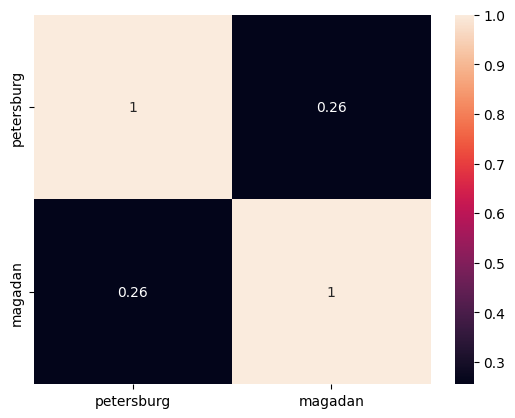

In [114]:
sns.heatmap(data.corr(), annot=True);

#### Корреляция между признаками отсутсвует

---

### Независимый t- тест
#### Зависимая переменная (размер устриц) является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

In [115]:
H0 = 'Нет значимой разницы в размерах мидий выращеный в разных городах.'
Ha = 'Есть значимая разница размерах мидий выращеный в разных городах.'

In [116]:
test_result = ttest_ind(data['petersburg'], data['magadan'], equal_var=True)
p_value = test_result[1]
mean_delta = round((mean(data['petersburg'])-mean(data['magadan']))/mean(data['magadan']),3) * 100 #Используем процентное выражение ввиду малой размерности

if p_value > alpha:
    print(f'p_value= {round(p_value,3)}\n{H0}')
else:
    print(f'p_value= {round(p_value,3)}\n{Ha} Разница в среднем размере мидий составляет: {mean_delta}%')

p_value= 0.01
Есть значимая разница размерах мидий выращеный в разных городах. Разница в среднем размере мидий составляет: 30.4%


---

### Дополнительно проведем тестирование через ANOVA тест

In [117]:
_, p_value = f_oneway(data['petersburg'], data['magadan'])

if p_value > alpha:
    print(f'p_value= {round(p_value,3)}\n{H0}')
else:
    print(f'p_value= {round(p_value,3)}\n{Ha} Разница в среднем размере мидий составляет: {mean_delta}%')

p_value= 0.01
Есть значимая разница размерах мидий выращеный в разных городах. Разница в среднем размере мидий составляет: 30.4%


---

### Z-тест
#### Проведем Z-тест для проверки двух независимых групп данных на равенство средних значений выборок.

In [120]:
_ ,p_value = weightstats.ztest(data['petersburg'], x2=data['magadan'], value=0,alternative='two-sided')

if p_value > alpha:
    print(f'p_value= {round(p_value,3)}\n{H0}')
else:
    print(f'p_value= {round(p_value,3)}\n{Ha} Разница в среднем размере мидий составляет: {mean_delta}%')

p_value= 0.002
Есть значимая разница размерах мидий выращеный в разных городах. Разница в среднем размере мидий составляет: 30.4%
